<a href="https://colab.research.google.com/github/JuanMelendres/proyecto_integrador_equipo19/blob/master/Avance1_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance 1. Análisis exploratorio de los datos

##Optimización de flujos quirúrgicos mediante IA

###Oscar Damián Vela Noyola A00821831
###Juan Antonio Melendres Villa A00369017
###Miguel Ángel Villanueva Amador A01793890


#### Librerías

Importamos las librerias que se llegaran a necesitar

In [1]:
import pandas as pd # Import pandas library
import matplotlib.pyplot as plt  # Import matplotlib library
import seaborn as sns
import numpy as np
from scipy import stats

#### Cargar set de datos original

Cargamos el data set original

In [2]:
# Load the data from the first sheet, and assign it to variable "df"
df = pd.read_excel('PQ.xlsx')
# Show the first 10 rows using dataframe.head() method
df.head(10)

,id,num,registro,edad,sexo,peso,tallacm,tallam,imc,Diabetes Mellitus (DM),...,observaciones,complicaciones30das,var103,obesidad,edadmayor60,hiperglucemia,dmdescontrol,complicacion,bhcanormal,qsanormal
0,1,713.0,745957,43,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,0
1,2,899.0,715767,19,2,62.0,160.0,1.60,24.22,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1
2,3,1414.0,718835,63,2,60.0,160.0,1.60,23.44,1.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
3,4,1664.0,780065,40,2,71.0,157.0,1.57,28.80,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
4,5,533.0,761613,52,1,73.0,161.0,1.61,28.16,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,0
5,6,1327.0,718672,27,1,67.0,160.0,1.60,26.17,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,1,1
6,7,NaN,763027,78,1,70.0,170.0,1.70,24.22,0.0,...,NaN,NaN,NaN,0,1,0,0.0,0,1,1
7,8,881.0,749454,74,2,71.6,147.0,1.47,33.13,0.0,...,NaN,NaN,NaN,1,1,0,0.0,0,0,1
8,9,1079.0,749394,52,2,89.0,154.0,1.54,37.53,1.0,...,NaN,NaN,NaN,1,0,0,0.0,0,1,1
9,10,1977.0,782561,43,2,60.0,160.0,1.60,23.44,0.0,...,NaN,NaN,NaN,0,0,0,0.0,0,0,1


In [3]:
df.shape[0] # CANTIDAD DE RENGLONES

2115

Durante el análisis del conjunto de datos, se llevará a cabo una evaluación exhaustiva para identificar la presencia de valores faltantes en las diferentes columnas. El primer paso consiste en determinar si existen registros incompletos, cuantificando la cantidad de valores ausentes por columna. Esto permitirá tener una visión clara de la magnitud del problema.

Posteriormente, se procederá a analizar los patrones de ausencia, con el fin de identificar si los valores faltantes se distribuyen de manera aleatoria o si siguen alguna tendencia. Para ello, se examinará si los datos ausentes están relacionados con ciertos grupos, categorías o características específicas. Además, se explorarán posibles correlaciones entre las columnas con datos faltantes y otras variables del conjunto de datos, lo que nos podría indicar si existe una relación subyacente que esté influyendo en la ausencia de información.

Este análisis es crucial para decidir la estrategia adecuada a seguir, como la imputación de valores faltantes o la eliminación de registros incompletos, dependiendo de la relevancia de los datos y los patrones identificados.

In [4]:
# Verificar si hay valores faltantes en todo el conjunto de datos
missing_values = df.isnull().sum()

# Filtrar las columnas que contienen valores faltantes
missing_values[missing_values > 0]


,0
num,75
peso,65
tallacm,72
tallam,72
imc,73
...,...
nmeroego,10
observaciones,1894
complicaciones30das,1695
var103,2113


El conjunto de datos tiene valores faltantes en 74 columnas. Algunas de las columnas con un número significativo de valores faltantes incluyen:

    observaciones: 1894 valores faltantes
    complicaciones30das: 1695 valores faltantes
    var103: 2113 valores faltantes
    num: 75 valores faltantes
    imc: 73 valores faltantes

Se observa que hay diferentes grados de valores ausentes, con algunas columnas que contienen muchos registros incompletos. Para identificar patrones específicos en las ausencias, se podrían analizar las correlaciones entre las columnas o investigar si los datos faltantes se concentran en ciertos rangos o categorías.

#### Separación de variables

En el proceso de preparación y limpieza del conjunto de datos, se ha llevado a cabo una separación de los distintos tipos de variables de entrada, con el objetivo de optimizar el análisis y evitar redundancias en la información.

En particular, algunas variables han sido ignoradas debido a que contienen información duplicada o equivalente a otras variables ya presentes en el conjunto de datos:

    DM controlada ha sido ignorada, ya que esta variable es redundante con la variable Diabetes Mellitus (DM), que abarca de manera más general el estado de la diabetes en los pacientes.

    htacontrol también se ha excluido del análisis, ya que su contenido es equivalente al de Hipertensión (HTA), una variable que ya recoge de forma más amplia la presencia o ausencia de hipertensión en los pacientes.

    ante_enfcoronaria_stent se ha descartado, ya que esta variable proporciona información duplicada con respecto a tipoenfermedadcoronaria, que ya describe de manera detallada la presencia de enfermedad coronaria, incluyendo el uso de stents en los pacientes.

Este enfoque de limpieza y consolidación de las variables permite reducir la redundancia y mejora la eficiencia del análisis, al enfocarse únicamente en aquellas variables que aportan información nueva o relevante para el estudio.

In [5]:
cat_vars_entrada = ["tipoenfermedadcoronaria", "cuales_antecedentes", "sexo", "diagnstico", "cirugaprogramada",
            "clasificacionanestes", "tipocomplic_transqx", "tipocomplic_postqx", "bacteriuria",
            "nitritos", "leucocituria", "eritrocituria", "hburia", "egoinfeccin", "egoanormal"]

num_vars_entrada = ["edad", "peso", "tallacm", "tallam", "imc", "hb", "hto","leucostotales",
            "linfos", "neutrofilos", "bandas", "plaquetas", "tp", "ttp", "glucosa", "bun",
            "creatinina", "trigliceridos", "colesterol", "sodio", "potasio", "cloro", "glucosuria"]

binary_vars_entrada = ["Diabetes Mellitus (DM)", "Hipertensión (HTA)",
               "Ante_IAM", "ante_arritmia", "otrosantecedentesimportantes",
               "cirugaprevia", "alcoholismo", "tabaquismo", "otros", "valoracion_cardiovascular",
               "primeraqx", "fr_anormal", "plaquetaanormal", "tpanormal", "ttpanormal", "glucosaanormal",
               "creatanormal", "esanormales", "repeticn_examen", "obesidad", "hiperglucemia",
               "bhcanormal", "qsanormal"]

Se organizan las variables de salida del conjunto de datos en dos grupos, dependiendo de su naturaleza:

1. **Variables categóricas** (`cat_vars_salida`): Estas son variables que pueden tomar varios valores discretos o categorías, y no siguen un orden inherente. En este caso, se identifican tres variables categóricas relacionadas con la salida del modelo:
   - **cualesadicionales**: Se refiere a información adicional específica que puede tener diversas categorías.
   - **resultadoanormal**: Indica resultados que no son normales, categorizados en diferentes tipos.
   - **examenesolicitados**: Se refiere a los exámenes o pruebas solicitadas, que también pueden tener múltiples categorías.

2. **Variables binarias** (`binary_vars_salida`): Estas son variables que pueden tomar uno de dos valores posibles, generalmente representando la presencia o ausencia de una característica o evento. Aquí se incluyen cuatro variables binarias:
   - **defuncin**: Indica si ocurrió una defunción (sí o no).
   - **complicaciones_transqx**: Se refiere a la presencia o ausencia de complicaciones durante la cirugía (transoperatorias).
   - **complicaciones_postqx**: Señala si hubo complicaciones después de la cirugía (postoperatorias).
   - **complicaciones30das**: Indica si ocurrieron complicaciones dentro de los primeros 30 días después de la cirugía.

Este enfoque de clasificación permite un tratamiento adecuado de las variables durante el análisis o el modelado, según sus características (categóricas o binarias).

In [6]:
cat_vars_salida = ["cualesadicionales", "resultadoanormal", "examenesolicitados"]

binary_vars_salida = ["defuncin", "complicaciones_transqx", "complicaciones_postqx", "complicaciones30das"]

####VARIABLES CATEGÓRICAS

Mostramos una serie de gráficos de caja (boxplots) que muestran cómo se distribuyen las variables numéricas edad, IMC, peso y glucosa en función de las variables categóricas sexo, obesidad y Diabetes Mellitus (DM). Estos gráficos te permiten observar la variabilidad y posibles diferencias en la distribución de los datos según cada categoría.

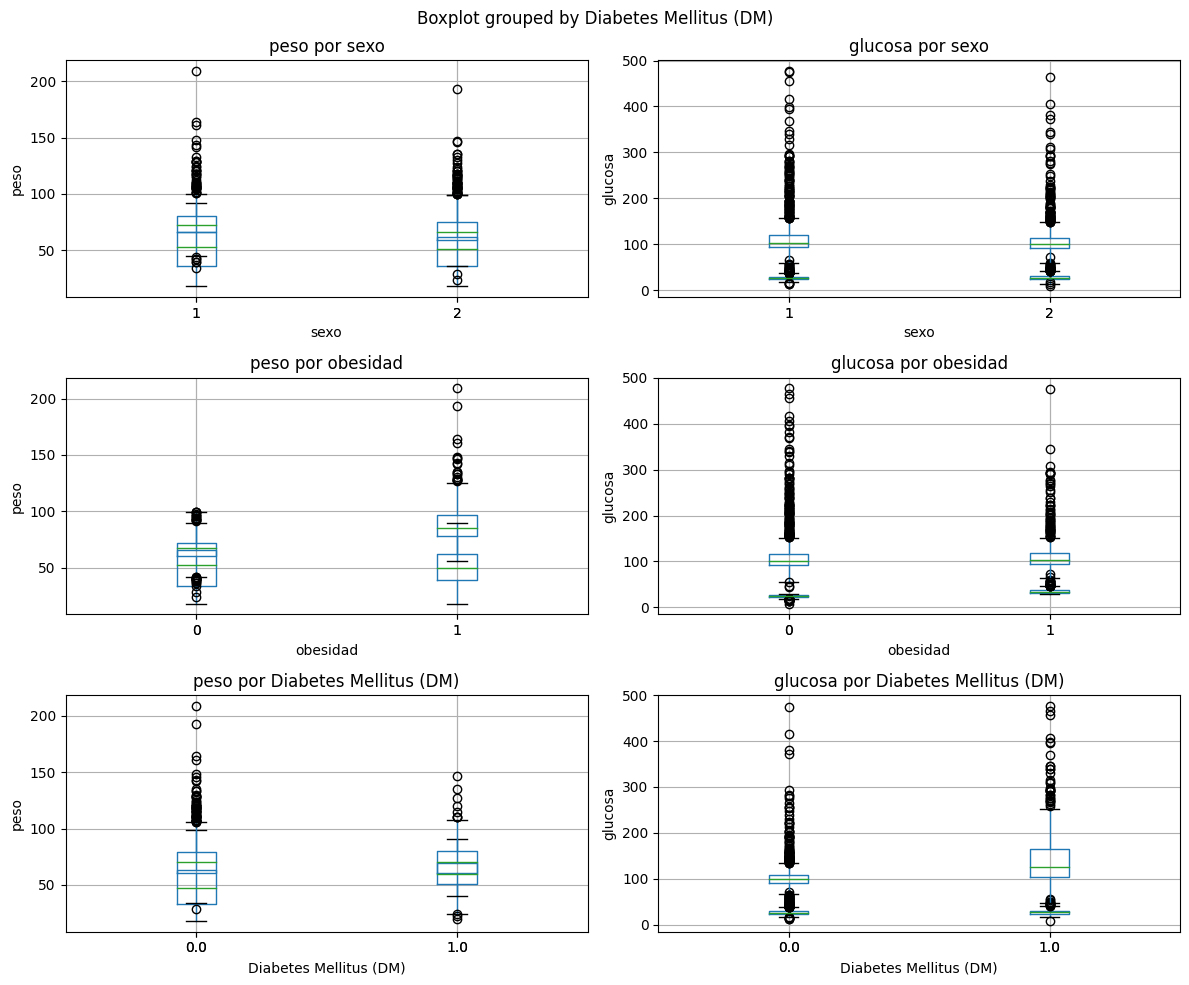

In [7]:
# Para explorar la distribución de datos numéricos basados ​​en algunas variables categóricas representativas,
# seleccionaremos algunas columnas categóricas clave y graficaremos la distribución de datos numéricos con respecto a ellas.

# Elejimos columnas numéricas y categóricas representativas para la exploración
numeric_columns = ['edad', 'imc', 'peso', 'glucosa']
categorical_columns = ['sexo', 'obesidad', 'Diabetes Mellitus (DM)']

# Creamos un conjunto de diagramas de caja para explorar cómo se distribuyen los datos numéricos entre estas variables categóricas.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Graficamos la distribución de columnas numéricas por variables categóricas
for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numeric_columns):
        df.boxplot(column=num_col, by=cat_col, ax=axes[i, j % 2])
        axes[i, j % 2].set_title(f'{num_col} por {cat_col}')
        axes[i, j % 2].set_ylabel(num_col)
        axes[i, j % 2].set_xlabel(cat_col)

plt.tight_layout()
plt.show()

In [8]:
# Función para analizar cada columna
def analizar_categorica(col):
    # Obtener los 3 valores más frecuentes
    top_3 = col.value_counts().nlargest(3)

    # Contar los valores nulos
    nulos = col.isna().sum()

    # Obtener la cardinalidad (número de valores únicos)
    cardinalidad = col.nunique()

    # Obtener el dato más largo en cuanto a número de caracteres (omitimos nulos)
    dato_mas_largo = col.dropna().astype(str).map(len).idxmax()
    dato_mas_largo_valor = col[dato_mas_largo]

    return top_3, nulos, cardinalidad, dato_mas_largo_valor

In [9]:
# Diccionario para almacenar los resultados
resultados = {}

# Iterar sobre cada columna categórica
for var in cat_vars_entrada:
    top_3, nulos, cardinalidad, dato_mas_largo_valor = analizar_categorica(df[var])
    resultados[var] = {
        'Top 3 más repetidos': top_3,
        'Datos nulos': nulos,
        'Cardinalidad': cardinalidad,
        'Dato más largo': dato_mas_largo_valor
    }

In [10]:
# Mostrar los resultados
for var, info in resultados.items():
    print("----------------------------------------------")
    print("----------------------------------------------")
    print("----------------------------------------------")
    print(f"Columna: {var}")
    print("----------------------------------------------")
    print("TOP 3")
    print(info['Top 3 más repetidos'])
    print("----------------------------------------------")
    print("Datos Nulos")
    print(info['Datos nulos'])
    print("----------------------------------------------")
    print("Cardinalidad")
    print(info['Cardinalidad'])
    print("----------------------------------------------")
    print("Dato más largo")
    print(info['Dato más largo'])

----------------------------------------------
----------------------------------------------
----------------------------------------------
Columna: tipoenfermedadcoronaria
----------------------------------------------
TOP 3
tipoenfermedadcoronaria
.                                                                 4
NO ESPECIFICADA                                                   2
CATETERISMO CARDIACO EN EL 2004 POR INFARTO AGUDO AL MIOCRADIO    1
Name: count, dtype: int64
----------------------------------------------
Datos Nulos
2075
----------------------------------------------
Cardinalidad
36
----------------------------------------------
Dato más largo
CATETERISMO CARDIACO HACE 5 AÑOS (DESCONOCE LA CAUSA) + RECAMBIO VALVULAR MECANICO (AORTICO Y MITRAL) EN TRATAMIENTO CON ACENOCUMARINA
----------------------------------------------
----------------------------------------------
----------------------------------------------
Columna: cuales_antecedentes
-------------------------



*   tipoenfermedadcoronaria: Se recomienda o quitar o hacer variable binaria. Tiene 98.1% de datos nulos y una cardinalidad de 36 (tiene mucha descripción para los pacientes que sí tienen alguna enfermedad).
*   cuales_antecedentes: tiene 51.2% de datos nulos y una cardinalidad de 871. Sin embargo, es porque cada celda tiene una lista de los antecedentes;
pensamos que puede ser útil conservarla pero haciendo unos cambios (clasificar en temas los antecedentes) y registrar si la persona tiene alguno convirtiéndola en varias columnas binarias (de los temas).
*   sexo: no tiene valores nulos, tiene 1 para masculino y 2 para femenino y los datos están balanceados.
*   diagnstico: tiene tan solo un valor nulo, representa el mismo problema que cuales_antecedentes. Podemos usarla separándola en temas.
*   cirugiaprogramada: no tiene datos nulos, tiene muchas descripciones que se puede hacer un regex para determinar el tema; sin embargo, recomendaría usar o el diagnóstico o la cirugía programada para no aumentar la cantidad de columnas y dado que ambas columnas representan casi lo mismo.
*   clasificacionanestes: representa con qué anestesia se hizo la cirugía.La cardinalidad es de 5, no tiene datos nulos. Esta columna se puede usar.
*   tipocomplic_transqx: podemos convertirla en un dato binario de si hubo o no complicaciones, el 98.67% son datos nulos; se recomienda mejor borrarla, puede no aportar mucho, hay otras columnas que contienen la misma información. Lo mismo para la complicación post.
*   nitritos: tiene solo 2 datos nulos; la cardinalidad es de 9. Podemos estandarizar más esta columna para tener solo 3 opciones, porque el resto de los valores que no son NR, POSITIVO o NEGATIVO son o números o ".", lo mismo para leucocituria o hburia.
*   egoinfeccin: cambiar a binario; la cardinalidad es de 2 ("SI", "NO").









In [11]:
# Diccionario para almacenar los resultados
resultados_salidas = {}

# Iterar sobre cada columna categórica
for var in cat_vars_salida:
    top_3, nulos, cardinalidad, dato_mas_largo_valor = analizar_categorica(df[var])
    resultados_salidas[var] = {
        'Top 3 más repetidos': top_3,
        'Datos nulos': nulos,
        'Cardinalidad': cardinalidad,
        'Dato más largo': dato_mas_largo_valor
    }

In [12]:
# Mostrar los resultados
for var, info in resultados_salidas.items():
    print("----------------------------------------------")
    print("----------------------------------------------")
    print("----------------------------------------------")
    print(f"Columna: {var}")
    print("----------------------------------------------")
    print("TOP 3")
    print(info['Top 3 más repetidos'])
    print("----------------------------------------------")
    print("Datos Nulos")
    print(info['Datos nulos'])
    print("----------------------------------------------")
    print("Cardinalidad")
    print(info['Cardinalidad'])
    print("----------------------------------------------")
    print("Dato más largo")
    print(info['Dato más largo'])

----------------------------------------------
----------------------------------------------
----------------------------------------------
Columna: cualesadicionales
----------------------------------------------
TOP 3
cualesadicionales
PFH            24
GASOMETRIAS    16
UROCULTIVO     12
Name: count, dtype: int64
----------------------------------------------
Datos Nulos
2006
----------------------------------------------
Cardinalidad
38
----------------------------------------------
Dato más largo
PERFIL LIPÍDICO, HEMOGLOBINA GLICOSILADA, CINÉTICA DE HIERRO, PERFIL TIROIDEO, PFH, PCR, INSULINA SERICA
----------------------------------------------
----------------------------------------------
----------------------------------------------
Columna: resultadoanormal
----------------------------------------------
TOP 3
resultadoanormal
0          1506
EKG         255
GLUCOSA      40
Name: count, dtype: int64
----------------------------------------------
Datos Nulos
3
---------------

*    Se propone combinar las columnas cuales_adicionales y resultadoanormal para unificar la información sobre los exámenes adicionales solicitados y aquellos que arrojaron resultados anormales. Esta fusión nos permitiría crear una variable de salida que ayude a identificar los exámenes necesarios para cada paciente.

Problema: La columna de exámenes adicionales tiene una cardinalidad de 38 y presenta hasta un 94.8% de valores nulos, mientras que los exámenes anormales tienen una cardinalidad mucho mayor (192) y solo 3 valores nulos. Para poder utilizarlas de manera eficiente, sería necesario aplicar una codificación one-hot, pero primero separando los exámenes en categorías mediante alguna técnica como expresiones regulares (regex). Esto resultaría en múltiples columnas de salida, dependiendo de cuántas categorías o temas se identifiquen.

*   En cuanto a la columna exámenes solicitados, se recomienda eliminarla, ya que su información no es esencial para nuestro objetivo. Dado que no buscamos realizar exámenes innecesarios, los exámenes solicitados no siempre representan los que realmente son requeridos para el paciente.

#### VARIABLES NUMÉRICAS

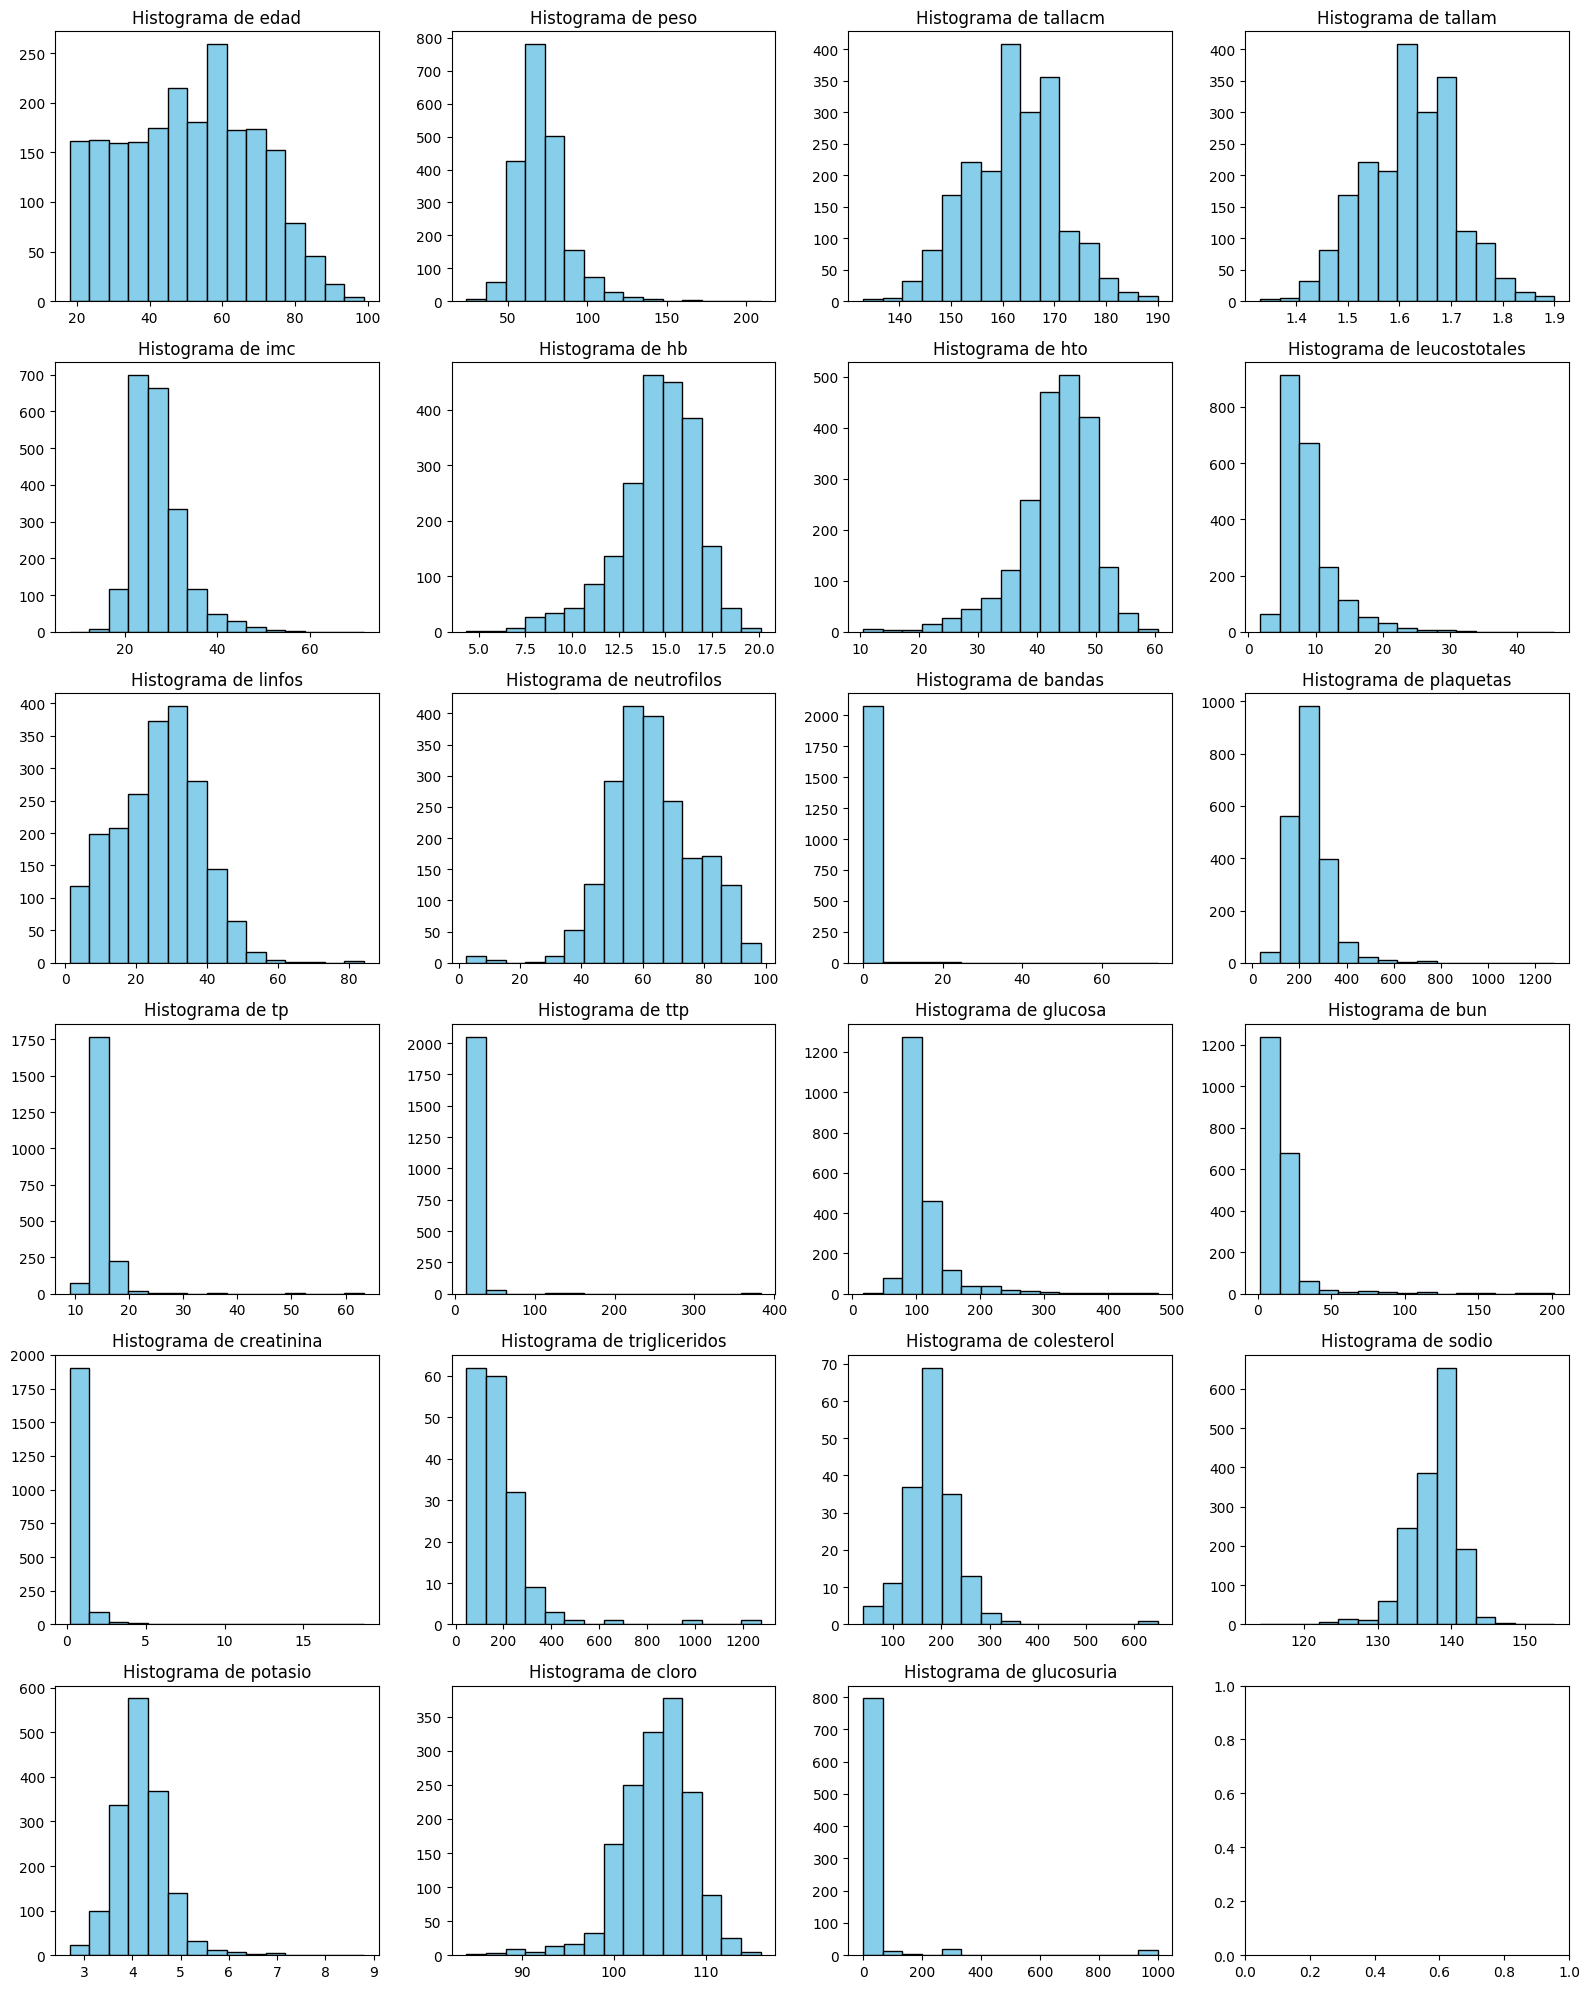

In [13]:
# Crear subplots para los histogramas
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))
axs = axs.flatten()

# Diccionario para almacenar las estadísticas resumidas
estadisticas_resumidas = {}

for i, var in enumerate(num_vars_entrada):
    col_data = df[var].dropna()  # Eliminar los valores NaN

    # Histograma
    axs[i].hist(col_data, bins=15, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {var}')

    # Estadísticas resumidas
    media = col_data.mean()
    mediana = col_data.median()
    std = col_data.std()
    varianza = col_data.var()
    kurtosis = col_data.kurtosis()

    # Detectar datos atípicos usando el método IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = col_data[(col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR))].count()

    # Guardar estadísticas en el diccionario
    estadisticas_resumidas[var] = {
        'Media': media,
        'Mediana': mediana,
        'Desviación Estándar': std,
        'Varianza': varianza,
        'Kurtosis': kurtosis,
        'Outliers (Atípicos)': outliers
    }

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

*   Con la información que se presenta en los histogramas, para los que están sesgados se le puede hacer una transformación Box-Cox o logarítmica: peso, imc, hb, hto, leucostales, plaquetas, linfos, trigliceridos y neutrofilos.
*   La creatinina y glucosuria tienen aspecto de no aportar mucha información y a simple vista se puede ver que tienen datos atípicos.
*   Los que no se mencionaron están bien y puede hacerse una transformación de raíz cuadrada y ajustar que queden entre -1 y 1.

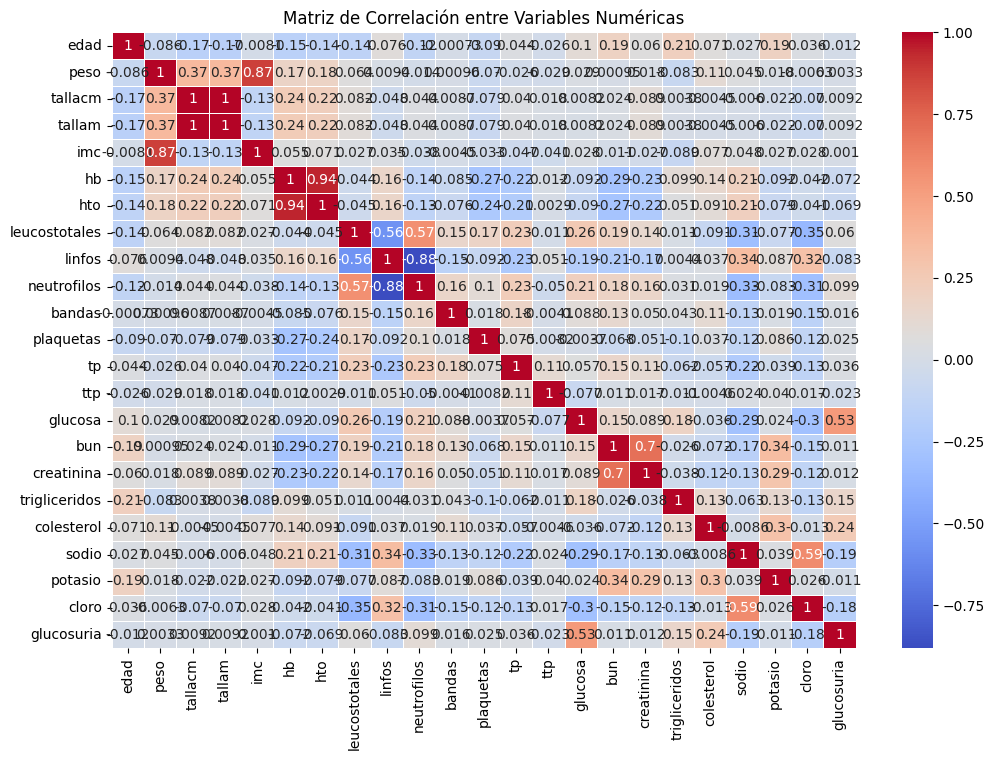

In [14]:
correlation_matrix = df[num_vars_entrada].corr()

# Mostrar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

Son una gran cantidad de variables pero a simple vista resalta:
*   correlación débil: del cloro con el sodio, la glucosuria y la glucosa, linfos y leucostotales.
*   correlación fuerte: creatinina y bun. Neutrofilos y linfos. icm y peso (obviamente)

tallam y tallacm es lo mismo pero entre 100 (podemos usar una u otra)

En el análisis PCA se pueden juntar esas variables y hacer agrupaciones de datos con correlación para tener menos variables por entrenar y mantener la misma información.

In [15]:
#EDAD
estadisticas_resumidas['edad']

{'Media': 50.686524822695034,
 'Mediana': 51.0,
 'Desviación Estándar': 18.208416628578387,
 'Varianza': 331.5464361198899,
 'Kurtosis': -0.9023729908992464,
 'Outliers (Atípicos)': 0}

In [16]:
#PESO
estadisticas_resumidas['peso']

{'Media': 71.80614146341465,
 'Mediana': 70.0,
 'Desviación Estándar': 15.950070563800864,
 'Varianza': 254.4047509902268,
 'Kurtosis': 6.920322350220513,
 'Outliers (Atípicos)': 67}

In [17]:
#TALLACM
estadisticas_resumidas['tallacm']

{'Media': 161.99534997552618,
 'Mediana': 162.0,
 'Desviación Estándar': 8.849049867509638,
 'Varianza': 78.30568355767235,
 'Kurtosis': -0.20822185591115527,
 'Outliers (Atípicos)': 1}

In [18]:
#TALLAM
estadisticas_resumidas['tallam']

{'Media': 1.6199534997552618,
 'Mediana': 1.62,
 'Desviación Estándar': 0.0884904986750962,
 'Varianza': 0.007830568355767203,
 'Kurtosis': -0.2082218559111526,
 'Outliers (Atípicos)': 1}

In [19]:
#IMC
estadisticas_resumidas['imc']

{'Media': 27.368663075416258,
 'Mediana': 26.16,
 'Desviación Estándar': 5.719733612403835,
 'Varianza': 32.715352596862225,
 'Kurtosis': 5.9276830548321655,
 'Outliers (Atípicos)': 101}

In [20]:
#HB
estadisticas_resumidas['hb']

{'Media': 14.541175912754861,
 'Mediana': 14.8,
 'Desviación Estándar': 2.1317236840524325,
 'Varianza': 4.544245865150075,
 'Kurtosis': 1.3044764761762595,
 'Outliers (Atípicos)': 80}

In [21]:
#HTO
estadisticas_resumidas['hto']

{'Media': 43.17556187766714,
 'Mediana': 44.0,
 'Desviación Estándar': 6.374802131065306,
 'Varianza': 40.63810221023476,
 'Kurtosis': 2.3214152532298504,
 'Outliers (Atípicos)': 84}

In [22]:
#LEUCOSTOTALES
estadisticas_resumidas['leucostotales']

{'Media': 8.850440967283072,
 'Mediana': 7.8,
 'Desviación Estándar': 4.087949308551727,
 'Varianza': 16.711329549288543,
 'Kurtosis': 9.82893565955801,
 'Outliers (Atípicos)': 138}

In [23]:
#LINFOS
estadisticas_resumidas['linfos']

{'Media': 26.237278450363196,
 'Mediana': 27.2,
 'Desviación Estándar': 11.771538121279725,
 'Varianza': 138.56910974074182,
 'Kurtosis': -0.061588476249911484,
 'Outliers (Atípicos)': 5}

In [24]:
#NEUTROFILOS
estadisticas_resumidas['neutrofilos']

{'Media': 63.225291262135926,
 'Mediana': 62.0,
 'Desviación Estándar': 14.25443349869589,
 'Varianza': 203.18887436874357,
 'Kurtosis': 0.9380413623062887,
 'Outliers (Atípicos)': 18}

In [25]:
#BANDAS
estadisticas_resumidas['bandas']

{'Media': 0.2666349809885932,
 'Mediana': 0.0,
 'Desviación Estándar': 2.6841513485714192,
 'Varianza': 7.204668462037768,
 'Kurtosis': 387.8260253511069,
 'Outliers (Atípicos)': 59}

In [26]:
#PLAQUETAS
estadisticas_resumidas['plaquetas']

{'Media': 244.1597913703177,
 'Mediana': 232.0,
 'Desviación Estándar': 84.72892132710271,
 'Varianza': 7178.990109254361,
 'Kurtosis': 15.544996570745703,
 'Outliers (Atípicos)': 67}

In [27]:
#TP
estadisticas_resumidas['tp']

{'Media': 14.779809342230696,
 'Mediana': 14.5,
 'Desviación Estándar': 2.418300905057015,
 'Varianza': 5.848179267399579,
 'Kurtosis': 178.7247287515203,
 'Outliers (Atípicos)': 137}

In [28]:
#TTP
estadisticas_resumidas['ttp']

{'Media': 30.49949951923077,
 'Mediana': 30.1,
 'Desviación Estándar': 8.990604257012114,
 'Varianza': 80.83096490620436,
 'Kurtosis': 1155.5656878513369,
 'Outliers (Atípicos)': 75}

In [29]:
#GLUCOSA
estadisticas_resumidas['glucosa']

{'Media': 112.54227602905569,
 'Mediana': 101.0,
 'Desviación Estándar': 42.43881333837137,
 'Varianza': 1801.0528775691275,
 'Kurtosis': 20.069909172835562,
 'Outliers (Atípicos)': 175}

In [30]:
#BUN
estadisticas_resumidas['bun']

{'Media': 16.227651663405087,
 'Mediana': 13.2,
 'Desviación Estándar': 14.524092225742766,
 'Varianza': 210.94925498188147,
 'Kurtosis': 52.61784313129039,
 'Outliers (Atípicos)': 121}

In [31]:
#CREATININA
estadisticas_resumidas['creatinina']

{'Media': 1.0607594936708862,
 'Mediana': 0.84,
 'Desviación Estándar': 1.3528676071188754,
 'Varianza': 1.8302507623915518,
 'Kurtosis': 73.57854388196263,
 'Outliers (Atípicos)': 137}

In [32]:
#TRIGLICERIDOS
estadisticas_resumidas['trigliceridos']

{'Media': 184.53,
 'Mediana': 159.5,
 'Desviación Estándar': 138.60301227547083,
 'Varianza': 19210.79501183432,
 'Kurtosis': 28.74468087005185,
 'Outliers (Atípicos)': 6}

In [33]:
#COLESTEROL
estadisticas_resumidas['colesterol']

{'Media': 182.9064,
 'Mediana': 185.0,
 'Desviación Estándar': 59.982532669696965,
 'Varianza': 3597.9042254712635,
 'Kurtosis': 20.51167548194087,
 'Outliers (Atípicos)': 9}

In [34]:
#SODIO
estadisticas_resumidas['sodio']

{'Media': 137.48235624999998,
 'Mediana': 138.0,
 'Desviación Estándar': 3.3590080150044237,
 'Varianza': 11.28293484486396,
 'Kurtosis': 4.617726028430491,
 'Outliers (Atípicos)': 41}

In [35]:
#POTASIO
estadisticas_resumidas['potasio']

{'Media': 4.21629375,
 'Mediana': 4.2,
 'Desviación Estándar': 0.5344915827152336,
 'Varianza': 0.28568125199343536,
 'Kurtosis': 6.45058308392239,
 'Outliers (Atípicos)': 37}

In [36]:
#CLORO
estadisticas_resumidas['cloro']

{'Media': 104.76293324775355,
 'Mediana': 105.0,
 'Desviación Estándar': 3.911326921699582,
 'Varianza': 15.298478288411928,
 'Kurtosis': 2.810236129271858,
 'Outliers (Atípicos)': 55}

In [37]:
#GLUCOSURIA
estadisticas_resumidas['glucosuria']

{'Media': 27.97764705882353,
 'Mediana': 0.0,
 'Desviación Estándar': 139.49431039599807,
 'Varianza': 19458.662632855052,
 'Kurtosis': 39.41233998288273,
 'Outliers (Atípicos)': 65}

#### VARIABLES BINARIAS

In [38]:
# Diccionario para almacenar los resultados
resultados_binarios = {}

# Iterar sobre cada variable binaria
for var in binary_vars_entrada:
    nulos = df[var].isna().sum()  # Contar valores nulos
    count_1 = (df[var] == 1).sum()  # Contar valores de 1
    count_0 = (df[var] == 0).sum()  # Contar valores de 0

    resultados_binarios[var] = {
        'Valores nulos': nulos,
        'Cantidad de 1': count_1,
        'Cantidad de 0': count_0
    }

In [39]:
# Mostrar los resultados
for var, info in resultados_binarios.items():
    print("----------------------------------------------")
    print("----------------------------------------------")
    print("----------------------------------------------")
    print(f"Variable: {var}")
    print("----------------------------------------------")
    print(f"Valores nulos: {info['Valores nulos']}")
    print(f"Cantidad de 1: {info['Cantidad de 1']}")
    print(f"Cantidad de 0: {info['Cantidad de 0']}\n")

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: Diabetes Mellitus (DM)
----------------------------------------------
Valores nulos: 4
Cantidad de 1: 394
Cantidad de 0: 1717

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: Hipertensión (HTA)
----------------------------------------------
Valores nulos: 5
Cantidad de 1: 505
Cantidad de 0: 1605

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: Ante_IAM
----------------------------------------------
Valores nulos: 4
Cantidad de 1: 31
Cantidad de 0: 2080

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: ante_arritmia
--------------------

Todas las variables, excepto:

    otrosantecedentesimportantes
    fr_anormal
    bhcanormal

presentan un desbalance en su distribución. Afortunadamente, la mayoría de estas variables tienen muy pocos valores nulos, lo cual es una ventaja para el análisis. Sin embargo, es posible que la variable otrosantecedentesimportantes sea eliminada, ya que originalmente la habíamos clasificado como una variable categórica, que pensábamos separar en diferentes temas.

In [40]:
# Diccionario para almacenar los resultados
resultados_binarios_salidas = {}

# Iterar sobre cada variable binaria
for var in binary_vars_salida:
    nulos = df[var].isna().sum()  # Contar valores nulos
    count_1 = (df[var] == 1).sum()  # Contar valores de 1
    count_0 = (df[var] == 0).sum()  # Contar valores de 0

    resultados_binarios_salidas[var] = {
        'Valores nulos': nulos,
        'Cantidad de 1': count_1,
        'Cantidad de 0': count_0
    }

In [41]:
# Mostrar los resultados
for var, info in resultados_binarios_salidas.items():
    print("----------------------------------------------")
    print("----------------------------------------------")
    print("----------------------------------------------")
    print(f"Variable: {var}")
    print("----------------------------------------------")
    print(f"Valores nulos: {info['Valores nulos']}")
    print(f"Cantidad de 1: {info['Cantidad de 1']}")
    print(f"Cantidad de 0: {info['Cantidad de 0']}\n")

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: defuncin
----------------------------------------------
Valores nulos: 0
Cantidad de 1: 18
Cantidad de 0: 2097

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: complicaciones_transqx
----------------------------------------------
Valores nulos: 0
Cantidad de 1: 28
Cantidad de 0: 2087

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: complicaciones_postqx
----------------------------------------------
Valores nulos: 0
Cantidad de 1: 50
Cantidad de 0: 2065

----------------------------------------------
----------------------------------------------
----------------------------------------------
Variable: complicaciones30das
-------------

Las complicaciones30das está casi toda vacía y tiene el nombre de la complicación. Es por eso que no sale nada. Pero se puede modificar a que sea binario. Todo lo demás está increíblemente desbalanceado (como era de esperarse pues son casos médicos).

#### Repositorio

Para compartir los resultados con el equipo docente se creó el siguiente [repositorio](https://github.com/JuanMelendres/proyecto_integrador_equipo19) en el cual iremos agregando nuestros resultados, notas, avances y código del proyecto.


#### Conclusión

La fase de **EDA (Exploratory Data Analysis)** es fundamental en cualquier proyecto de análisis de datos, ya que permite comprender en profundidad el conjunto de datos con el que se trabaja. Durante esta etapa, se identifican las principales características de las variables, como su distribución, presencia de valores nulos, tipos de datos y posibles outliers. Además, se pueden detectar patrones subyacentes y relaciones entre las variables, lo que facilita la toma de decisiones informadas sobre cómo limpiar, transformar y estructurar los datos para el análisis posterior.

El EDA también es esencial para identificar problemas como la multicolinealidad, la redundancia de variables, el desbalance de clases y la necesidad de imputación de valores faltantes. A través de herramientas visuales y estadísticas descriptivas, el EDA proporciona una visión clara del estado de los datos, lo que resulta en una mejor preparación para las siguientes fases del análisis o modelado.

En resumen, el EDA no solo ayuda a conocer mejor los datos, sino que también orienta sobre las estrategias más efectivas para abordarlos, optimizando el análisis y la generación de insights de calidad.

Este conjunto de datos ofrece una rica base para el análisis exploratorio, lo que podría ayudar a identificar factores de riesgo y relaciones entre diversas condiciones médicas.